In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df_irrigacao = pd.read_csv('dados_de_irrigacao.csv')

df_irrigacao.head()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333


## EDA


In [3]:
df_irrigacao.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


<Axes: xlabel='Horas de Irrigação', ylabel='Área Irrigada por Ângulo'>

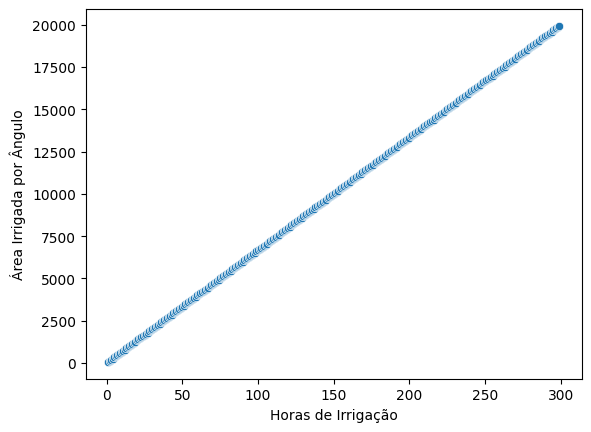

In [4]:
# Plot de Distribuição (Scatter Plot)
import seaborn as sns
# X = Horas de Irrigação
# y = Área Irrigada por Ângulo
sns.scatterplot(data=df_irrigacao, x= 'Horas de Irrigação', y= 'Área Irrigada por Ângulo')


<Axes: ylabel='Horas de Irrigação'>

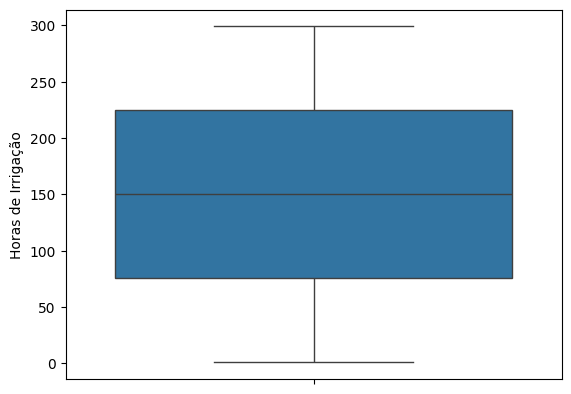

In [5]:
# Verificação de Outliers (BoxPLot)
# Coluna 'Horas de Irrigação'
sns.boxplot(data=df_irrigacao, y='Horas de Irrigação')

<Axes: ylabel='Área Irrigada por Ângulo'>

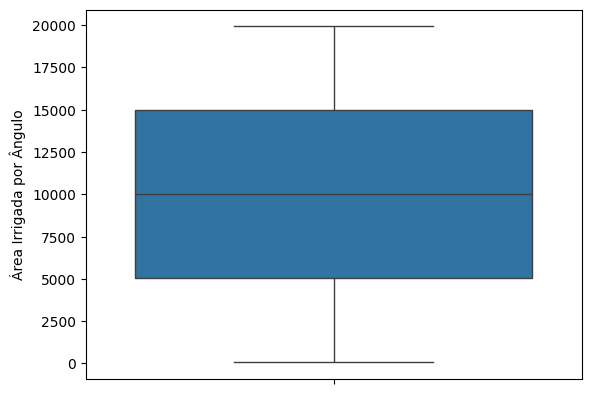

In [6]:
# Coluna 'Área Irrigada por Ângulo'
sns.boxplot(data=df_irrigacao, y='Área Irrigada por Ângulo')

<Axes: >

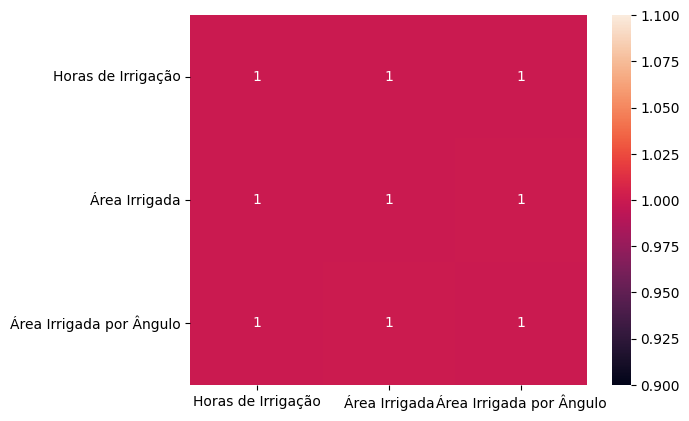

In [7]:
# Verificar Correlação de Variaveis (Método Pearson)
sns.heatmap(df_irrigacao.corr('pearson'), annot = True)

<Axes: >

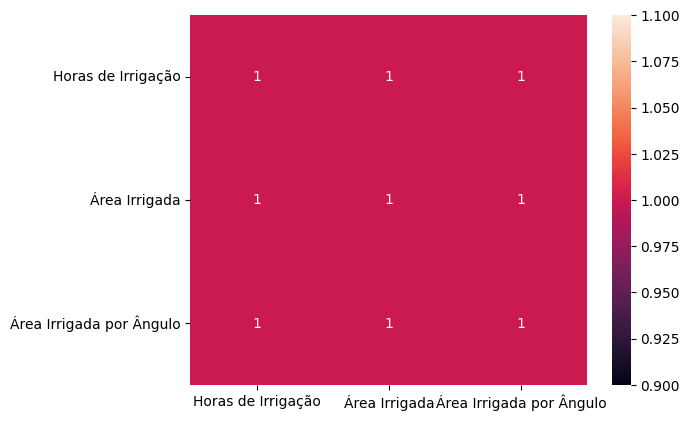

In [8]:
# Verificar Correlação de Variaveis (Método Spearman)
sns.heatmap(df_irrigacao.corr('spearman'), annot = True)

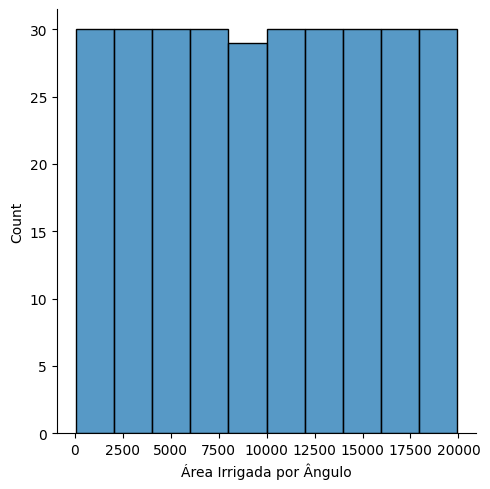

In [9]:
# Histograma das Variaveis
sns.displot(data=df_irrigacao, x='Área Irrigada por Ângulo')

## Separação e Treinamento do Modelo

In [10]:
#Dividir X e Y entre Treino e Teste
X = df_irrigacao.drop('Horas de Irrigação', axis=1)
y = df_irrigacao['Horas de Irrigação']

In [11]:
# Usar o train_test_split para a divisão
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Usar a Regressão Linear para treinar o modelo
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

## Validação de Modelo

In [13]:
# Predição dos Valores com base no conjunto de Testes

y_pred = reg_model.predict(X_test)

In [14]:
# Calcular métrica R-Squared ou Coeficiente de Determinação
# R2 mede o quão bem o modelo explica a variabilidade dos dados.
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


1.0

In [15]:
# Calcular MAE (Mean Absolute Error)
# Media (y_test - y_pred)
# Métrica de fácil interpretação e menos sensível a outliers
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

1.712210620199686e-14

In [16]:
# Calcular MSE (Mean Absolute Error)
# Media (y_test - y_pred)**2
# Não é uma métrica de fácil interpretação e mais sensível a outliers (pela elevação ao quadrado)
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

4.540420416817071e-28

In [17]:
# Calcular RMSE (Square Root Mean Absolute Error)
# Raiz(Media(y_test - y_pred)**2)

from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)

2.130826228676818e-14

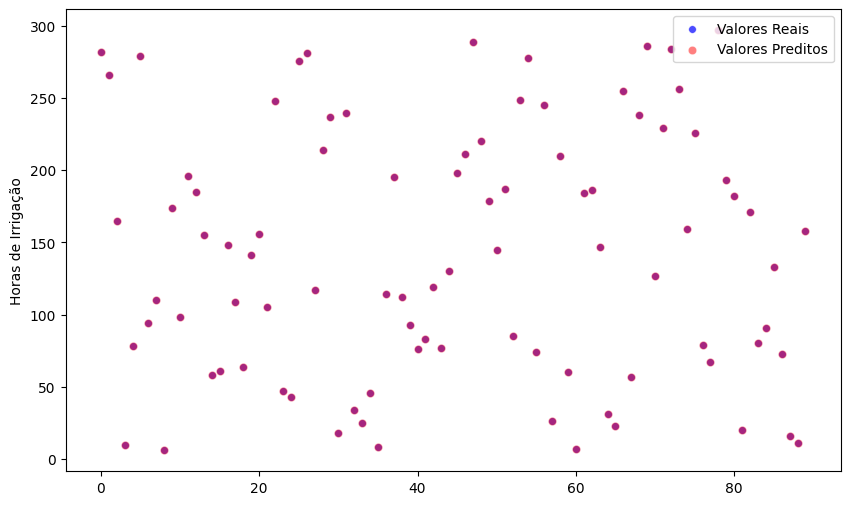

In [18]:
# Análise Gráfica

x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test, color='blue', label='Valores Reais', alpha=0.7, s=30)
sns.scatterplot(x=x_axis, y=y_pred, color='red', label='Valores Preditos', alpha=0.5)



plt.legend()
plt.show()

## Análise de Resíduos

In [19]:
# Calcular Resíduos
residuos = y_test - y_pred


In [20]:
# Calcular os resíduos padronizados (standardization)
# Para cada elemento de um conjunto (X - media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

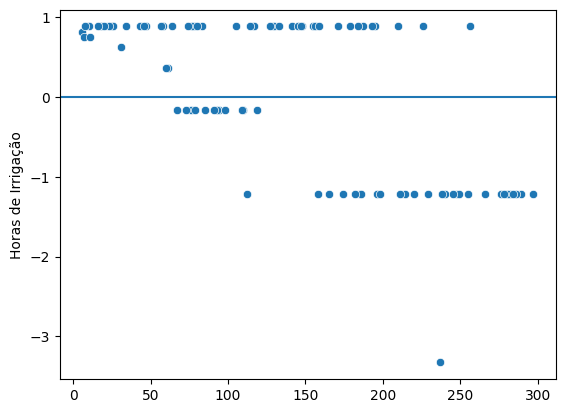

In [21]:
# Verificar Linearidade do Modelo
# Se os residuos estiverem entre -2 e +2 na escala padrão, indica linearidade

# Verificar homogeneidade das variâncias (homocedasticidade)
# Caso contrario, se tivermos algum padrão (formar um cone, funil), há heterocedasticidade

sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)

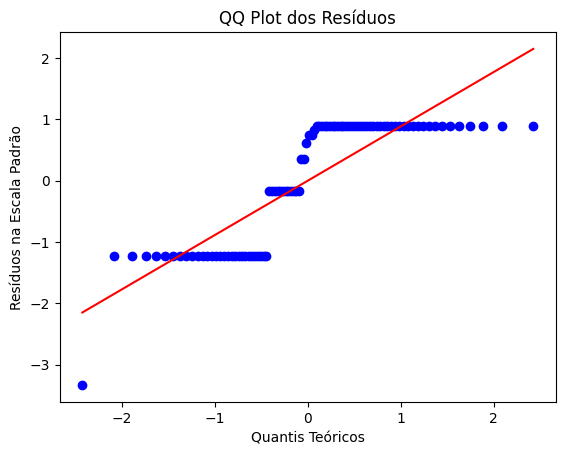

In [ ]:
# Checar se os residuos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot, avalia se uma amostra segue a distribuição normal
import matplotlib.pyplot as plt
import scipy.stats as stats

stats.probplot(residuos_std, dist="norm", plot=plt)
plt.xlabel("Quantis Teóricos")
plt.ylabel("Resíduos na Escala Padrão")
plt.title("QQ Plot dos Resíduos")
plt.show()


In [23]:
# Teste de Normalidade - Shapiro Wilk
# H0 - Segue Distribuição Normal
# H1 - Não Segue Distribuição Normal
# Se o p_valor > 0.05 não rejeita H0, caso contrario, rejeitamos
from scipy.stats import shapiro

stat_shapiro, p_valor_shapiro = shapiro(residuos)
print("Estatística do teste: {} e P-Valor: {}".format(stat_shapiro, p_valor_shapiro))


Estatística do teste: 0.74815370633241 e P-Valor: 4.0213313715578395e-11


In [25]:
# Teste de Normalidade -  Kolgomorov Smirnov
# H0 - Segue Distribuição Normal
# H1 - Não Segue Distribuição Normal
# Se o p_valor > 0.05 não rejeita H0, caso contrario, rejeitamos
from scipy.stats import kstest


stat_ks, p_valor_ks = kstest(residuos, 'norm')
print("Estatística do teste: {} e P-Valor: {}".format(stat_ks, p_valor_ks))


Estatística do teste: 0.4999999999999887 e P-Valor: 2.4869515015783833e-21


## Predições com o Modelo

In [35]:
# Se eu irrigar uma area de 500 e o ângulo da area de irrigação for 333.333333, quanto tempo levaria para irrigar a área:
reg_model.predict([[500, 333.3333333]])




c:\Users\arthu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.])